# Data analysis

In this section we will check how good the data is, by subjecting it to different processes.

**The goal of the whole project is to predict the next year's playoff variable (Y/N) in the teams table for the next year.** 

## Selected data

From the domain analysis we have decided to focus on these attributes:

- teams.csv
  - year
  - tmID
  - playoff
  - name
  - won
  - lost
  - GP
  - o_fgm
  - o_fga
  - o_ftm
  - o_fta
  - o_3pm
  - o_3pa
  - o_oreb
  - o_dreb
  - o_reb
  - o_asts
  - o_pf
  - o_stl
  - o_to
  - o_blk
  - o_pts
  - d_fgm
  - d_fga
  - d_ftm
  - d_fta
  - d_3pm
  - d_3pa
  - d_oreb
  - d_dreb
  - d_reb
  - d_asts
  - d_pf
  - d_stl
  - d_to
  - d_blk
  - d_pts
- teams_post.csv ❌
- series_post.csv ❌
- awards_players.csv
  - playerID
  - award
  - year
- coaches.csv
  - coachID
  - year
  - tmID
  - stint
  - won
  - lost
- players.csv
  - bioID
  - pos
  - height?
- players_teams.csv 
  - playerID
  - year
  - tmID
  - minutes
  - points
  - oRebounds
  - dRebounds
  - oRebounds
  - dRebounds 
  - rebounds 
  - assists 
  - steals
  - blocks
  - turnovers 
  - PF
  - fgAttempted 
  - fgMade 
  - ftAttempted 
  - ftMade 
  - threeAttempted 
  - threeMade 



In [13]:
# Load libraries
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn import tree

In [16]:
# Define chosen attributes
teams_attributes = ["year", "tmID", "playoff",  "name", "won", "lost", "GP", "o_fgm", "o_fga", "o_ftm", "o_fta", "o_3pm", "o_3pa", "o_oreb", "o_dreb", "o_reb", "o_asts", "o_pf", "o_stl", "o_to", "o_blk", "o_pts", "d_fgm", "d_fga", "d_ftm", "d_fta", "d_3pm", "d_3pa", "d_oreb", "d_dreb", "d_reb", "d_asts", "d_pf", "d_stl", "d_to", "d_blk", "d_pts"]
coaches_attributes = ["coachID", "year", "tmID", "stint", "won", "lost"]
players_attributes = ["bioID", "pos", "height"]
players_teams_attributes = ["playerID","year","tmID","minutes","points","oRebounds","dRebounds","oRebounds","dRebounds", "rebounds", "assists", "steals","blocks","turnovers", "PF","fgAttempted", "fgMade", "ftAttempted", "ftMade", "threeAttempted", "threeMade"]
awards_players_attributes = ["playerID", "award", "year"]

# Define the datasets
df_teams = pd.read_csv("./datasets/original/teams.csv")
df_coaches = pd.read_csv("./datasets/original/coaches.csv")
df_players = pd.read_csv("./datasets/original/players.csv")
df_players_teams = pd.read_csv("./datasets/original/players_teams.csv")
df_awards_players = pd.read_csv("./datasets/original/awards_players.csv")

## Teams table analysis

[Text(0.4727272727272727, 0.9807692307692307, 'attend <= 144875.5\ngini = 0.492\nsamples = 142\nvalue = [62, 80]'),
 Text(0.26590909090909093, 0.9423076923076923, 'attend <= 100243.5\ngini = 0.497\nsamples = 95\nvalue = [51, 44]'),
 Text(0.24772727272727274, 0.9038461538461539, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]'),
 Text(0.2840909090909091, 0.9038461538461539, 'attend <= 142584.5\ngini = 0.5\nsamples = 87\nvalue = [43, 44]'),
 Text(0.26590909090909093, 0.8653846153846154, 'attend <= 117224.0\ngini = 0.497\nsamples = 82\nvalue = [38, 44]'),
 Text(0.09090909090909091, 0.8269230769230769, 'attend <= 106806.0\ngini = 0.475\nsamples = 18\nvalue = [11, 7]'),
 Text(0.05454545454545454, 0.7884615384615384, 'attend <= 104223.5\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(0.03636363636363636, 0.75, 'attend <= 102937.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.01818181818181818, 0.7115384615384616, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.05454545454545454, 0.7115

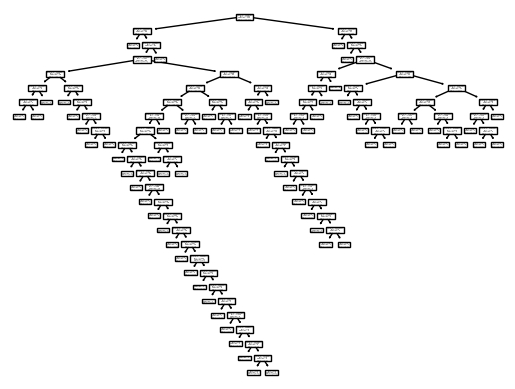

In [7]:
features=["attend"]
X = df_teams[features]
y = df_teams['playoff']

dtree = DecisionTreeClassifier()
dtree = dtree.fit(X, y)

tree.plot_tree(dtree, feature_names=features) 

# Split dataset into training set and test set





In [8]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test
#trainmask=df_teams[df_teams["year"]>3] #train
#testmask=df_teams[df_teams["year"]<=3] #test

X_train=df_teams[df_teams["year"]>3][features]
X_test=df_teams[df_teams["year"]<=3][features]
y_train=df_teams[df_teams["year"]>3]["playoff"]
y_test=df_teams[df_teams["year"]<=3]["playoff"]

#use latest years for training and leave older years for testing
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
#add other stuff indexex, confusion matrix for exmaple


Accuracy: 0.4583333333333333


In [9]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)


In [10]:
conf_matrix #70 to 30% random #acc78??? ifk

array([[13, 11],
       [15,  9]], dtype=int64)

In [11]:
conf_matrix # train is over 3 #acc 91

array([[13, 11],
       [15,  9]], dtype=int64)

In [12]:
conf_matrix #train is over 4 #acc 80

array([[13, 11],
       [15,  9]], dtype=int64)

### Check for null values


In [6]:
df_teams.isnull().sum()

year        0
lgID        0
tmID        0
franchID    0
confID      0
           ..
confW       0
confL       0
min         0
attend      0
arena       0
Length: 61, dtype: int64

<AxesSubplot: >

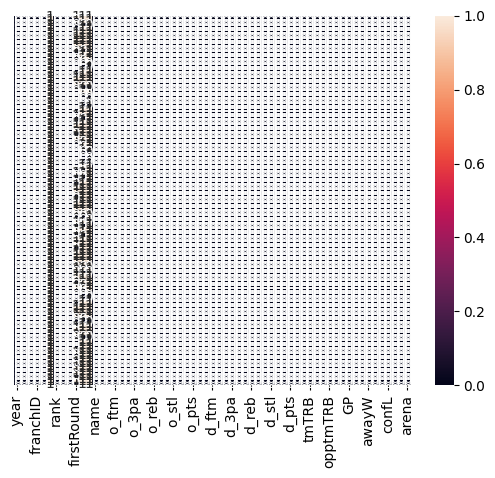

In [11]:
sns.heatmap(df_teams.isnull(), yticklabels=False, annot=True)

In [ ]:
df_teams.dropna(how="all")

## Players table analysis

**1st** Check for null values. Some players have a lot of missing values and we assume they are totally wrong.



In [38]:
df_players.head()

df_players.replace("''", np.nan)

df_players.head()

,bioID,pos,firstseason,lastseason,height,weight,college,collegeOther,birthDate,deathDate
0,abrahta01w,C,0,0,74.0,190,George Washington,NaN,1975-09-27,NaN
1,abrossv01w,F,0,0,74.0,169,Connecticut,NaN,1980-07-09,NaN
2,adairje01w,C,0,0,76.0,197,George Washington,NaN,1986-12-19,NaN
3,adamsda01w,F-C,0,0,73.0,239,Texas A&M,Jefferson College (JC),1989-02-19,NaN
4,adamsjo01w,C,0,0,75.0,180,New Mexico,NaN,1981-05-24,NaN
